In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer

pd.options.display.max_columns = 30
%matplotlib inline

# Analyzing text!

Text analysis has a few parts. We are going to use **bag of words** analysis, which just treats a sentence like a bag of words - no particular order or anything. It's simple but it usually gets the job done adequately.

Here is our text.

In [2]:
texts = [
    "Penny bought bright blue fishes.",
    "Penny bought bright blue and orange fish.",
    "The cat ate a fish at the store.",
    "Penny went to the store. Penny ate a bug. Penny saw a fish.",
    "It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.",
    "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
    "Penny is a fish"
]

When you process text you have a nice long series of steps, but if we want to be general we're interested in three things:

1. **Tokenizing** converts all of the sentences/phrases/etc into a series of words, and then it might also include converting it into a series of numbers - math stuff only works with numbers, not words. So maybe 'cat' is 2 and 'rug' is 4 and stuff like that.
2. **Counting** takes those words and sees how many there are (obviously) - how many times does `meow` appear?
3. **Normalizing** takes the count and makes new numbers - maybe it's how many times `meow` appears vs. how many total words there are, or maybe you're seeing how often `meow` comes up to see whether it's important.

## Why tokenizing and counting are difficult

Tokenizing and counting are kind of funny, because they *seem* like they'd be simple. If we have a sentence and want to figure out how many times some word appears in it, why do we need some fancy library? Can't we just use `.count` on our strings?

Let's count the number of times "store" appears in the following sentence.

In [3]:
"I went to the store today, but the store was closed".count("store")

2

Seems simple enough, and it seems like it worked, but *it's a trick*. Let's find out how many times "can" shows up in the following sentence.

In [4]:
"The toucan doesn't like pelicans".count("can")

2

Oof! `.count` tells you whether the *string* shows up anywhere, not the *word*. So if "can" is in "toucan" or "pelican" `.count` still counts it.

"But!" you exclaim. "What if we split the string and use `.count` for the array?" You'd be right! ...kind of.

In [5]:
# .split() or .split(" ") will separate a string into a list of words
"The toucan doesn't like pelicans".split(" ")

['The', 'toucan', "doesn't", 'like', 'pelicans']

In [6]:
# Then we can ask whether that list contains 'can'
"The toucan doesn't like pelicans".split(" ").count("can")

0

In [7]:
# Or 'toucan'
"The toucan doesn't like pelicans".split(" ").count("toucan")

1

This looks better and works great for *that* example, but once I start throwing punctuation in things get hairy.

In [8]:
"What about the mouse!!!!!".split(" ")

['What', 'about', 'the', 'mouse!!!!!']

Notice how instead of `"mouse"` we have `"mouse!!!!!"`? That's going to be a problem, since we won't be able to get an exact match.

In [9]:
"What about the mouse!!!!!".split(" ").count("mouse")

0

In [10]:
"What about the mouse!!!!!".split(" ").count("mouse!!!!!")

1

Sure, we might be able to get rid of the punctuation... and then later, make everything lowercase so "Mouse" and "mouse" are the same... and this, and that, and a thousand other things. That's why we rely on library!

Unfortunately there are about ten thousand libraries, each with their own strengths and weaknesses. For now we're going to be using [scikit-learn](http://scikit-learn.org/), which is a machine learning library. We like it because it plugs into pandas very easily.

## Penny and the fishes

In [11]:
texts = [
    "Penny bought bright blue fishes.",
    "Penny bought bright blue and orange fish.",
    "The cat ate a fish at the store.",
    "Penny went to the store. Penny ate a bug. Penny saw a fish.",
    "It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.",
    "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
    "Penny is a fish"
]

In [12]:
"Penny bought bright blue fishes".split()

['Penny', 'bought', 'bright', 'blue', 'fishes']

      Penny bought bright blue fishes.

If we want to **tokenize** that sentence, we'd like to lowercase it, removing the punctuation and split on spaces - `penny bought bright blue fishes`. It also works for other languages:

      у меня зазвонил телефон

That's Russian for "my phone is ringing." It works just as well with the tokenizer we used for English - lowercase it, remove punctuation, split on spaces. No big deal!

      私はえんぴつです。
  
This is Japanese for "I am a pencil." It *doesn't* work with our tokenizer, since it doesn't have spaces. You don't treat every character separately, either - `私` and `は` are their own thing, but `えんぴつ` means "pencil" and `です` is "to be."

"Eastern" languages need special tokenizing (and usually other treatment) when doing text analysis, mostly because they don't have spaces. They're collectively referred to as "CJK" languages, for Chinese, Japanese and Korean. It includes languages outside of those three, too, as long as they don't adhere to the "just make it lowercase and split on spaces" rules. You'll need to track down special tokenizers if you're working with those languages.


## Getting to work

The `scikit-learn` package does a **ton of stuff**, some of which includes the above. We're going to start by playing with the `CountVectorizer`, which helps us tokenize **and** count.

"What is vectorizing?!?!" You might (understandable) exclaim, hands formed into claws. It's just a stupid technical word that mean "turning words into numbers." If you're thinking about worrying about it, don't worry about it.

First we need to **create a `CountVectorizer`** to do the work for us. It seems like a kind of useless line of code, but it's just because we aren't giving `CountVectorizer` any options just yet.

In [13]:
# Import the CountVectorizer code from scikit-learn
# And create a new vectorizer that will do our counting later
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

Now we'll put it to use by using the `.fit_transform` method. This basically means "figure out the words in the texts and count them all."

In [14]:
# .fit_transfer TOKENIZES and COUNTS
matrix = vectorizer.fit_transform(texts)

Let's take a look at what it found out!

In [15]:
matrix

<7x23 sparse matrix of type '<class 'numpy.int64'>'
	with 49 stored elements in Compressed Sparse Row format>

Okay, that looks like trash and garbage. What's a "sparse array"??????

In [16]:
matrix.toarray()

array([[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1],
       [1, 3, 0, 0, 0, 0, 1, 0, 3, 0, 1, 3, 2, 1, 1, 0, 0, 0, 1, 0, 4, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

This is going to take a little imagination, but bear with me!

**Each one of those rows is one of our texts.** The first row represents our first sentence, the second row represents our second sentence, and so on. 

|sentence|representation|
|---|---|
|Penny bought bright blue fishes.|`[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`|
|Penny bought bright blue and orange fish.|`[1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]`|
|The cat ate a fish at the store|`[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]`|
|...etc|...etc|

**Each number is the number of appearances of a possible word.** We don't know what the words they're counting are just yet, but we know the first sentence has 0 of the first word, 0 of the second word, 0 of the third word, and 1 of words four, five and six. If we compare it to the second sentence, we see they have a lot of the same numbers in the columns - that means they're similar sentences!

But let's be honest: we can't *read* that. It would look nicer as a dataframe. So, well, let's take the `matrix` and make it a dataframe.

In [17]:
# You get an error doing pd.DataFrame(matrix), you need the .toarray() part
pd.DataFrame(matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,3,1,0,1,1,1,1
4,1,3,0,0,0,0,1,0,3,0,1,3,2,1,1,0,0,0,1,0,4,0,0
5,0,2,0,0,0,0,0,3,2,0,3,0,0,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


Each row is one of our sentences, sure, but what do all of those numbers mean???? I want to know what word number 0 is, and word number 1, and word number 2, and so on!

Luckily when we used our vectorizer it remembered all of the words, so we can take a peek at them. When you're doing machine learning, anything interesting about an object is called a **feature**. It's interesting that these sentences have this word or that word, so they're called **features**.

In [18]:
print(vectorizer.get_feature_names())

['and', 'at', 'ate', 'blue', 'bought', 'bright', 'bug', 'cat', 'fish', 'fishes', 'is', 'it', 'meowed', 'meowing', 'once', 'orange', 'penny', 'saw', 'still', 'store', 'the', 'to', 'went']


Because we're excellent programmers, we know that we can combine the last two snippets of code, so we'll

1. create a dataframe of our matrix, while also
2. specifying column names using our vocabulary list

and then we'll have a beautiful dataframe of all of our word counts, with very nice titles.

In [19]:
pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

,and,at,ate,blue,bought,bright,bug,cat,fish,fishes,is,it,meowed,meowing,once,orange,penny,saw,still,store,the,to,went
0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,3,1,0,1,1,1,1
4,1,3,0,0,0,0,1,0,3,0,1,3,2,1,1,0,0,0,1,0,4,0,0
5,0,2,0,0,0,0,0,3,2,0,3,0,0,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


So sentence #4 has "at" twice, and the first sentence has "bought" once, and the fifth sentence has "the" five times.

Hmmm, 'bought' might be interesting, but "the" sure isn't. Neither is "and" or "to," I think. Who cares about boring words like that? Not me! I just think they're cluttering up our dataframe.

We can actually have the vectorizer *totally ignore them*. Words you ignore are called **stopwords**, and they're a common way to simplify your text analysis. Most text analysis software comes with prebuilt lists of stopwords - we're just going to tell our vectorizer to use the standard list for Engish.

In [20]:
# We'll make a new vectorizer
vectorizer = CountVectorizer(stop_words='english')
# Find all the words and count them
matrix =vectorizer.fit_transform(texts)
# And let's look at the feature names
print(vectorizer.get_feature_names())

['ate', 'blue', 'bought', 'bright', 'bug', 'cat', 'fish', 'fishes', 'meowed', 'meowing', 'orange', 'penny', 'saw', 'store', 'went']


Looks good! See, no more "the" or "and" - life is perfect now. Let's make another dataframe!

In [21]:
# We've done this before!
pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

,ate,blue,bought,bright,bug,cat,fish,fishes,meowed,meowing,orange,penny,saw,store,went
0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0
1,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,0,3,1,1,1
4,0,0,0,0,1,0,3,0,2,1,0,0,0,0,0
5,0,0,0,0,0,3,2,0,0,1,1,0,0,1,0
6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## Lemmatizing and stemming

I do have an issue with this, though - I see separate entries for `meowed` and `meowing` and `fish` and `fishes`, even though they kind of seem like the same words to me! I mean, they kind of *are* the same words: they're just different *forms*.

To do that kind of simplification, you can either **stem** or **lemmatize** your words. Stemming is a lazy way of chopping off endings, while **lemmatization** means you looked the word up in the dictionary to find out what the simple form of the word should be.

You can tell the difference with something like "running" vs "ran."

|word|stem|lemma|
|---|---|---|
|runner|run|run|
|running|run|run|
|ran|ran|run|

Lemmas are better than stems, but they also take a lot more work and time! So how are we gonna do this? We pick another library!

**TextBlob:** Some people use TextBlob for lemmatizing. *We ain't gonna do it!* It's a nice library, but by default it thinks everything is a noun. That makes for bad lemmatizing, because it needs to understand that "running" is a verb to make it into "run."

**spaCy:** We're going to use spaCy instead. It's like a cool new hip NLTK. It's kind of weird until you get used to it, though.

## spaCy: A weird but good text analysis thingie

spaCy is a dream, but a dream where sometimes your legs won't move right and you can't read text. But sometimes you can fly! So yes, as always, ups and downs.

In [22]:
import spacy
# Create a spacy natural-language processor for English
nlp = spacy.load('en')

**Didn't that take forever to load?** I'd like to think it's because it's SO SMART. spaCy knows an insane amount of information about each token in your text. Things like the lemma, [detailed part-of-speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html), whether it's part of a stopword list, punctuation etc. See a full [list here](https://spacy.io/docs/api/token) and see an example of a few below!

In [23]:
doc = nlp("It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.")

print("Sentence: ", doc, "\n")

for token in doc[:7]:
    print("               original |", token.orth_)
    print("                  lemma |", token.lemma_)
    print("        is punctuation? |", token.is_punct)
    print("            is numeric? |", token.is_digit)
    print("         is a stopword? |", token.is_stop)
    print("         part of speech |", token.pos_)
    print("           detailed POS |", token.tag_)
    print("")

Sentence:  It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish. 

               original | It
                  lemma | -PRON-
        is punctuation? | False
            is numeric? | False
         is a stopword? | True
         part of speech | PRON
           detailed POS | PRP

               original | meowed
                  lemma | meow
        is punctuation? | False
            is numeric? | False
         is a stopword? | False
         part of speech | VERB
           detailed POS | VBD

               original | once
                  lemma | once
        is punctuation? | False
            is numeric? | False
         is a stopword? | True
         part of speech | ADV
           detailed POS | RB

               original | at
                  lemma | at
        is punctuation? | False
            is numeric? | False
         is a stopword? | True
         part of speech | ADP
           detailed POS | IN

               origi

Remember tokenization, where you break the sentence into words? By default spaCy **includes punctuation** in its list of tokens - notice the commas and periods that are included in the following.

In [24]:
tokens = [token for token in doc]
print(tokens)

[It, meowed, once, at, the, fish, ,, it, is, still, meowing, at, the, fish, ., It, meowed, at, the, bug, and, the, fish, .]


**Aside:** Why are we using a list comprehension? Because we have to. Because spaCy is weird.

Since we don't like the punctuation in our list of tokens, we can use an `if` condition in a list comprehension to say hey, we don't want things that are punctuation!

In [25]:
tokens = [token for token in doc if not token.is_punct]
print(tokens)

[It, meowed, once, at, the, fish, it, is, still, meowing, at, the, fish, It, meowed, at, the, bug, and, the, fish]


And then maybe we can convert them to lemmas...

In [26]:
lemmas = [token.lemma_ for token in tokens]
print(lemmas)

['-PRON-', 'meow', 'once', 'at', 'the', 'fish', '-PRON-', 'be', 'still', 'meow', 'at', 'the', 'fish', '-PRON-', 'meow', 'at', 'the', 'bug', 'and', 'the', 'fish']


spaCy decided that there's no basic form for pronouns, so it just *replaced them all with `-PRON-`.* I don't know how I feel about this, so I'm going to go ahead and make an insane list comprehension to keep the original version if it's a pronoun.

In [27]:
lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
print(lemmas)

['It', 'meow', 'once', 'at', 'the', 'fish', 'it', 'be', 'still', 'meow', 'at', 'the', 'fish', 'It', 'meow', 'at', 'the', 'bug', 'and', 'the', 'fish']


Since we've made a lot of changes, let's put all of the code in one place to see how spaCy works.

In [28]:
import spacy
# Create a spacy natural-language processor for English
# This usually takes a little bit
nlp = spacy.load('en')

In [29]:
# Process our text with the spaCy processor
doc = nlp("It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.")
# Turn it into tokens, ignoring the punctuation
tokens = [token for token in doc if not token.is_punct]
# Convert those tokens into lemmas, EXCEPT the pronouns, we'll keep those.
lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
print(lemmas)

['It', 'meow', 'once', 'at', 'the', 'fish', 'it', 'be', 'still', 'meow', 'at', 'the', 'fish', 'It', 'meow', 'at', 'the', 'bug', 'and', 'the', 'fish']


## Lemmatizing with a vectorizer

Now that we've figured out how to turn a sentence into lemmas, we need to put it to use with our `CountVectorizer`. Luckily we can just say "hey, vectorizer, we made a thingie that breaks the text into pieces, please use it instead of whatever you already use" and it will say "sounds great I will use that."

In [30]:
def lemmatize(text):
    doc = nlp(text)
    # Turn it into tokens, ignoring the punctuation
    tokens = [token for token in doc if not token.is_punct]
    # Convert those tokens into lemmas, EXCEPT the pronouns, we'll keep those.
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

We'll make a new vectorizer, but now anytime it wants to break down text, it will send the text to our 'lemmatize' function that we wrote above.

In [31]:
vectorizer = CountVectorizer(stop_words='english', tokenizer=lemmatize)
# Find all the words and count them
matrix = vectorizer.fit_transform(texts)
matrix

<7x11 sparse matrix of type '<class 'numpy.int64'>'
	with 30 stored elements in Compressed Sparse Row format>

What words did we get back?

In [32]:
print(vectorizer.get_feature_names())

['blue', 'bright', 'bug', 'buy', 'cat', 'eat', 'fish', 'meow', 'orange', 'penny', 'store']


Looks great! While we're at it, can we see it as a dataframe?

In [33]:
pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

,blue,bright,bug,buy,cat,eat,fish,meow,orange,penny,store
0,1,1,0,1,0,0,1,0,0,1,0
1,1,1,0,1,0,0,1,0,1,1,0
2,0,0,0,0,1,1,1,0,0,0,1
3,0,0,1,0,0,1,1,0,0,3,1
4,0,0,1,0,0,0,3,3,0,0,0
5,0,0,0,0,3,0,2,1,1,0,1
6,0,0,0,0,0,0,1,0,0,1,0


**Beautiful.**

# TF-IDF

## Part One: Term Frequency

TF-IDF? What? It means **term frequency inverse document frequency!** (of course!) TF-IDF is the most important thing in history, so we should probably learn it.

Let's look at our list of phrases:

1. Penny bought bright blue fishes.
2. Penny bought bright blue and orange fish.
3. The cat ate a fish at the store.
4. Penny went to the store. Penny ate a bug. Penny saw a fish.
5. It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.
6. The cat is fat. The cat is orange. The cat is meowing at the fish.
7. Penny is a fish

If we're searching for the word **`fish`**, which is the most helpful phrase?

In [34]:
pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

,blue,bright,bug,buy,cat,eat,fish,meow,orange,penny,store
0,1,1,0,1,0,0,1,0,0,1,0
1,1,1,0,1,0,0,1,0,1,1,0
2,0,0,0,0,1,1,1,0,0,0,1
3,0,0,1,0,0,1,1,0,0,3,1
4,0,0,1,0,0,0,3,3,0,0,0
5,0,0,0,0,3,0,2,1,1,0,1
6,0,0,0,0,0,0,1,0,0,1,0


**Probably the one where `fish` appears three times.**

    It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.
    
So yeah, that clearly wins. But what about other sentences that talk about fish? Which one is more about fish?

    Penny is a fish.

    Penny went to the store. Penny ate a bug. Penny saw a fish.

Hmmm! They both have "fish" once, but the first one *only* talks about fish, while the second one talks about a bunch of *other* stuff, too. I would probably say the first one is more about fish!

Think about a huge long document where they say your name once, versus a tweet where they say your name once. Which one are you more important in? Probably the tweet, since you take up a larger percentage of the text!

Tada: this idea is called **term frequency** - taking into account how often a term shows up vs how big the text is. 

Instead of just COUNTing the number of times a word shows up in a text, we're now going to divide it by the total number of words. So with "Penny is a fish," "fish" only shows up once but it's 25% of the text.

To do this we're going to use scikit-learn's `TfidfVectorizer`. Don't fret, it's almost exactly the same as the `CountVectorizer`, it just does that division for you!

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=lemmatize, use_idf=False, norm='l1')

In terms of options, we're giving our TfidfVectorizer a handful:

* **`stop_words='english'`** to get ignore words like 'and' and 'the'
* **`tokenizer=lemmatize`** to have it lemmatize the words using the function we wrote up above
* **`use_idf=False`** to keep it only using TF (term frequency), not IDF (inverse document frequency), which we'll talk about later
* **`norm='l1'`** so it only does simple division - X appearances divided by Y words

Now let's use it!

In [36]:
matrix = tfidf_vectorizer.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())

,blue,bright,bug,buy,cat,eat,fish,meow,orange,penny,store
0,0.200000,0.200000,0.000000,0.200000,0.000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000
1,0.166667,0.166667,0.000000,0.166667,0.000,0.000000,0.166667,0.000000,0.166667,0.166667,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.250,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000
3,0.000000,0.000000,0.142857,0.000000,0.000,0.142857,0.142857,0.000000,0.000000,0.428571,0.142857
4,0.000000,0.000000,0.142857,0.000000,0.000,0.000000,0.428571,0.428571,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.375,0.000000,0.250000,0.125000,0.125000,0.000000,0.125000
6,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000


Now our numbers have shifted a little bit. Instead of just being a count, it's *the percentage of the words*.

    value = (number of times word appears in sentence) / (number of words in sentence)

After we remove the stopwords, the term `fish` is 50% of the words in `Penny is a fish` vs. 37.5% in `It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.`.

> **Note:** We made it be the percentage of the words by passing in `norm="l1"` - by default it's normally an L2 (Euclidean) norm, which is actually better, but I thought it would make more sense using the L1 - a.k.a. terms divided by words -norm.

So now when we search we'll get **more relevant results** because it takes into account whether half of our words are `fish` or 1% of millions upon millions of words is `fish`. But we aren't done yet!

## Part Two: Inverse document frequency

Let's say we're searching for "fish meow orange," and want to find the most relevant document.

In [37]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=lemmatize, use_idf=False, norm='l1')
matrix = tfidf_vectorizer.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())
df

,blue,bright,bug,buy,cat,eat,fish,meow,orange,penny,store
0,0.200000,0.200000,0.000000,0.200000,0.000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000
1,0.166667,0.166667,0.000000,0.166667,0.000,0.000000,0.166667,0.000000,0.166667,0.166667,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.250,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000
3,0.000000,0.000000,0.142857,0.000000,0.000,0.142857,0.142857,0.000000,0.000000,0.428571,0.142857
4,0.000000,0.000000,0.142857,0.000000,0.000,0.000000,0.428571,0.428571,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.375,0.000000,0.250000,0.125000,0.125000,0.000000,0.125000
6,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000


How do we know which is the best for "fish meow?" Should we just add up who has the highest combined "fish" and "meow?"

In [38]:
# Just add the columns together
added = pd.DataFrame([df['fish'], df['meow'], df['orange'], df['fish'] + df['meow'] + df['orange']], index=["fish", "meow", "orange", "fish + meow + orange"]).T
added['text'] = texts
added

,fish,meow,orange,fish + meow + orange,text
0,0.200000,0.000000,0.000000,0.200000,Penny bought bright blue fishes.
1,0.166667,0.000000,0.166667,0.333333,Penny bought bright blue and orange fish.
2,0.250000,0.000000,0.000000,0.250000,The cat ate a fish at the store.
3,0.142857,0.000000,0.000000,0.142857,Penny went to the store. Penny ate a bug. Penn...
4,0.428571,0.428571,0.000000,0.857143,"It meowed once at the fish, it is still meowin..."
5,0.250000,0.125000,0.125000,0.500000,The cat is at the fish store. The cat is orang...
6,0.500000,0.000000,0.000000,0.500000,Penny is a fish


Number 4 wins by far, but 5 and 6 even, both at **0.5**. The sentence are these:

    The cat is at the fish store. The cat is orange. The cat is meowing at the fish.
    Penny is a fish.

Seems like BS to me! The second sentence *doesn't even have the words meow or orange*.

It seems like since `fish` shows up again and again it should be weighted a little less - not like it's a *stopword*, but just... it's kind of cliche to have it show up in the text, so we want to make it less important. And since "orange" is super rare, the computer should be really excited about finding it somewhere.

This idea is called **inverse document frequency** - the more often a term shows up across *all* documents, the less important it is in our matrix. So TFIDF is:

* **Term frequency:** Does it show up a lot in our document? It's important!
* **Inverse document frequency:** Does it show up a lot in all our documents? It's boring!

In [39]:
# use_idf=True is default, but I'll leave it in
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=lemmatize, use_idf=True, norm='l1')
matrix = tfidf_vectorizer.fit_transform(texts)
tfidf_df = pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_df

,blue,bright,bug,buy,cat,eat,fish,meow,orange,penny,store
0,0.235463,0.235463,0.000000,0.235463,0.000000,0.000000,0.118871,0.000000,0.000000,0.174741,0.000000
1,0.190587,0.190587,0.000000,0.190587,0.000000,0.000000,0.096216,0.000000,0.190587,0.141437,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.297654,0.297654,0.150267,0.000000,0.000000,0.000000,0.254425
3,0.000000,0.000000,0.179021,0.000000,0.000000,0.179021,0.090377,0.000000,0.000000,0.398562,0.153021
4,0.000000,0.000000,0.181340,0.000000,0.000000,0.000000,0.274642,0.544019,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.437035,0.000000,0.147088,0.145678,0.145678,0.000000,0.124521
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404858,0.000000,0.000000,0.595142,0.000000


Let's compare our OLD values with our NEW values

In [40]:
# OLD: Just TF
added = pd.DataFrame([df['fish'], df['meow'], df['orange'], df['fish'] + df['meow'] + df['orange']], index=["fish", "meow", "orange", "fish + meow + orange"]).T
added['text'] = texts
added

,fish,meow,orange,fish + meow + orange,text
0,0.200000,0.000000,0.000000,0.200000,Penny bought bright blue fishes.
1,0.166667,0.000000,0.166667,0.333333,Penny bought bright blue and orange fish.
2,0.250000,0.000000,0.000000,0.250000,The cat ate a fish at the store.
3,0.142857,0.000000,0.000000,0.142857,Penny went to the store. Penny ate a bug. Penn...
4,0.428571,0.428571,0.000000,0.857143,"It meowed once at the fish, it is still meowin..."
5,0.250000,0.125000,0.125000,0.500000,The cat is at the fish store. The cat is orang...
6,0.500000,0.000000,0.000000,0.500000,Penny is a fish


In [41]:
# NEW: TF-IDF
added = pd.DataFrame([tfidf_df['fish'], tfidf_df['meow'], tfidf_df['orange'], tfidf_df['fish'] + tfidf_df['meow'] + tfidf_df['orange']], index=["fish", "meow", "orange", "fish + meow + orange"]).T
added['text'] = texts
added

,fish,meow,orange,fish + meow + orange,text
0,0.118871,0.000000,0.000000,0.118871,Penny bought bright blue fishes.
1,0.096216,0.000000,0.190587,0.286802,Penny bought bright blue and orange fish.
2,0.150267,0.000000,0.000000,0.150267,The cat ate a fish at the store.
3,0.090377,0.000000,0.000000,0.090377,Penny went to the store. Penny ate a bug. Penn...
4,0.274642,0.544019,0.000000,0.818660,"It meowed once at the fish, it is still meowin..."
5,0.147088,0.145678,0.145678,0.438444,The cat is at the fish store. The cat is orang...
6,0.404858,0.000000,0.000000,0.404858,Penny is a fish


If we lok at sentence #4 specifically, "It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish."

|word|before|after|
|---|---|---|
|fish|0.428571|0.274642|
|meow|0.428571|0.544019|

Notice how 'meow'increased in value because it's an infrequent term across all of the documents, and `fish` dropped in value because it's used *all over the place*.

If we want a more wild difference, let's try changing from simple percentage normalization to the default, `l2` norms with `norm='l2'` (or just removing `norm` completely).

In [42]:
# use_idf=True is default, but I'll leave it in
l2_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=lemmatize, use_idf=True)
matrix = l2_vectorizer.fit_transform(texts)
l2_df = pd.DataFrame(matrix.toarray(), columns=l2_vectorizer.get_feature_names())
l2_df

,blue,bright,bug,buy,cat,eat,fish,meow,orange,penny,store
0,0.512612,0.512612,0.000000,0.512612,0.000000,0.000000,0.258786,0.000000,0.000000,0.380417,0.000000
1,0.456170,0.456170,0.000000,0.456170,0.000000,0.000000,0.230292,0.000000,0.456170,0.338530,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.578752,0.578752,0.292176,0.000000,0.000000,0.000000,0.494698
3,0.000000,0.000000,0.354840,0.000000,0.000000,0.354840,0.179137,0.000000,0.000000,0.789996,0.303305
4,0.000000,0.000000,0.285205,0.000000,0.000000,0.000000,0.431948,0.855616,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.840166,0.000000,0.282766,0.280055,0.280055,0.000000,0.239382
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562463,0.000000,0.000000,0.826823,0.000000


In [43]:
# NEW: TF-IDF
added = pd.DataFrame([tfidf_df['fish'], tfidf_df['meow'], tfidf_df['orange'], tfidf_df['fish'] + tfidf_df['meow'] + tfidf_df['orange']], index=["fish", "meow", "orange", "fish + meow + orange"]).T
added['text'] = texts
added

,fish,meow,orange,fish + meow + orange,text
0,0.118871,0.000000,0.000000,0.118871,Penny bought bright blue fishes.
1,0.096216,0.000000,0.190587,0.286802,Penny bought bright blue and orange fish.
2,0.150267,0.000000,0.000000,0.150267,The cat ate a fish at the store.
3,0.090377,0.000000,0.000000,0.090377,Penny went to the store. Penny ate a bug. Penn...
4,0.274642,0.544019,0.000000,0.818660,"It meowed once at the fish, it is still meowin..."
5,0.147088,0.145678,0.145678,0.438444,The cat is at the fish store. The cat is orang...
6,0.404858,0.000000,0.000000,0.404858,Penny is a fish


In [44]:
# NEW: TF-IDF
added = pd.DataFrame([l2_df['fish'], l2_df['meow'], l2_df['orange'], l2_df['fish'] + l2_df['meow'] + l2_df['orange']], index=["fish", "meow", "orange", "fish + meow + orange"]).T
added['text'] = texts
added

,fish,meow,orange,fish + meow + orange,text
0,0.258786,0.000000,0.000000,0.258786,Penny bought bright blue fishes.
1,0.230292,0.000000,0.456170,0.686462,Penny bought bright blue and orange fish.
2,0.292176,0.000000,0.000000,0.292176,The cat ate a fish at the store.
3,0.179137,0.000000,0.000000,0.179137,Penny went to the store. Penny ate a bug. Penn...
4,0.431948,0.855616,0.000000,1.287564,"It meowed once at the fish, it is still meowin..."
5,0.282766,0.280055,0.280055,0.842876,The cat is at the fish store. The cat is orang...
6,0.562463,0.000000,0.000000,0.562463,Penny is a fish


**LOOK AT HOW IMPORTANT MEOW IS**. Meowing is out of this world important, because *no one ever meows*.

# Who cares? Why do we need to know this?

When someone dumps 100,000 documents on your desk in response to FOIA, you'll start to care! One of the reasons understanding **TF-IDF** is important is because of **document similarity**. By knowing what documents are similar you're able to find related documents and automatically group documents into clusters.

## K-Means clustering

For example! Let's cluster these sentences using K-Means clustering (check out [this gif](http://practicalcryptography.com/media/miscellaneous/files/k_mean_send.gif)). It's a magic way to say "these documents are similar to each other" that I'm not really going to explain very much of.

In [45]:
texts

['Penny bought bright blue fishes.',
 'Penny bought bright blue and orange fish.',
 'The cat ate a fish at the store.',
 'Penny went to the store. Penny ate a bug. Penny saw a fish.',
 'It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.',
 'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
 'Penny is a fish']

In [46]:
# Initialize a vectorizer
# Not including use_idf=True because it's true by default
vectorizer = TfidfVectorizer(tokenizer=lemmatize, stop_words='english')
matrix = vectorizer.fit_transform(texts)
matrix

<7x11 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [47]:
pd.DataFrame(matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,10
0,0.512612,0.512612,0.000000,0.512612,0.000000,0.000000,0.258786,0.000000,0.000000,0.380417,0.000000
1,0.456170,0.456170,0.000000,0.456170,0.000000,0.000000,0.230292,0.000000,0.456170,0.338530,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.578752,0.578752,0.292176,0.000000,0.000000,0.000000,0.494698
3,0.000000,0.000000,0.354840,0.000000,0.000000,0.354840,0.179137,0.000000,0.000000,0.789996,0.303305
4,0.000000,0.000000,0.285205,0.000000,0.000000,0.000000,0.431948,0.855616,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.840166,0.000000,0.282766,0.280055,0.280055,0.000000,0.239382
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562463,0.000000,0.000000,0.826823,0.000000


**STEP ONE:** "Hey, k-means, cluster my documents into two categories"

In [48]:
# KMeans clustering is a method of clustering.
from sklearn.cluster import KMeans

number_of_clusters = 2
# Create the classifier
km = KMeans(n_clusters=number_of_clusters)
# Put them into categories
km.fit(matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**STEP TWO:** "Hey, k-means, tell me about the categories"

In [49]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: cat meow fish store eat
Cluster 1: penny fish buy bright blue


So we have a **cluster about fish and cats** and a **cluster about penny and fish**. You can see the categories by looking at `km.labels_` - it goes in the same order as your original text documents.

In [50]:
km.labels_

array([1, 1, 0, 1, 0, 0, 1], dtype=int32)

In [51]:
texts

['Penny bought bright blue fishes.',
 'Penny bought bright blue and orange fish.',
 'The cat ate a fish at the store.',
 'Penny went to the store. Penny ate a bug. Penny saw a fish.',
 'It meowed once at the fish, it is still meowing at the fish. It meowed at the bug and the fish.',
 'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
 'Penny is a fish']

But obviously we're going to make a dataframe out of it because we love pandas and readability.

In [52]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,Penny bought bright blue fishes.,1
1,Penny bought bright blue and orange fish.,1
2,The cat ate a fish at the store.,0
3,Penny went to the store. Penny ate a bug. Penn...,1
4,"It meowed once at the fish, it is still meowin...",0
5,The cat is at the fish store. The cat is orang...,0
6,Penny is a fish,1


Seems like it makes sense! The fun thing about k-means is you can demand however many categories you want, and it has no choice but to comply.

### 4 categories of documents

In [53]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: cat meow fish store eat
Cluster 1: buy bright blue penny fish
Cluster 2: penny fish eat bug store


In [55]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,Penny bought bright blue fishes.,1
1,Penny bought bright blue and orange fish.,1
2,The cat ate a fish at the store.,0
3,Penny went to the store. Penny ate a bug. Penn...,2
4,"It meowed once at the fish, it is still meowin...",0
5,The cat is at the fish store. The cat is orang...,0
6,Penny is a fish,2


## Let's try to graph the similarity

In [56]:
texts = ['Penny bought bright blue fishes.',
 'Penny bought bright blue and orange bowl.',
 'The cat ate a fish at the store.',
 'Penny went to the store. Penny ate a bug. Penny saw a fish.',
 'It meowed once at the bug, it is still meowing at the bug and the fish',
 'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
 'Penny is a fish.',
 'Penny Penny she loves fishes Penny Penny is no cat.',
 'The store is closed now.',
 'How old is that tree?',
 'I do not eat fish I do not eat cats I only eat bugs']


# Initialize a vectorizer
# "max_features" means "only figure out 2 words to use"
vectorizer = TfidfVectorizer(max_features=2, tokenizer=lemmatize, stop_words='english')
matrix = vectorizer.fit_transform(texts)

What are our two features it decided were important?

In [57]:
vectorizer.get_feature_names()

['fish', 'penny']

So every single row has a rating for how much about fish it is, and a rating for how much about Penny it is. We can look at it in a dataframe!

In [58]:
df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
df

,fish,penny
0,0.605349,0.795961
1,0.000000,1.000000
2,1.000000,0.000000
3,0.245735,0.969337
4,1.000000,0.000000
5,1.000000,0.000000
6,0.605349,0.795961
7,0.186785,0.982401
8,0.000000,0.000000
9,0.000000,0.000000


And hey, if we have numbers, we can make a graph!

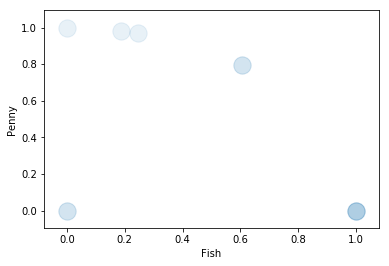

In [59]:
ax = df.plot(kind='scatter', x='fish', y='penny', alpha=0.1, s=300)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

Sentences in the bottom right are not about Penny and are a lot about fish, ones on the top left are about Penny and not fish, and ones in the bottom left aren't about *either*.

What does k-means have to say about this? It'll hopefully group sentences that are similar to each other.

In [60]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)
df['category'] = km.labels_

In [61]:
df

,fish,penny,category
0,0.605349,0.795961,0
1,0.000000,1.000000,0
2,1.000000,0.000000,1
3,0.245735,0.969337,0
4,1.000000,0.000000,1
5,1.000000,0.000000,1
6,0.605349,0.795961,0
7,0.186785,0.982401,0
8,0.000000,0.000000,2
9,0.000000,0.000000,2


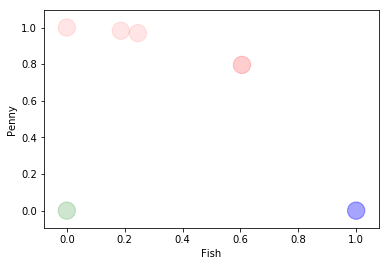

In [62]:
color_list = ['r', 'b', 'g', 'y']
colors = [color_list[i] for i in df['category']]

ax = df.plot(kind='scatter', x='fish', y='penny', alpha=0.1, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

**AW YEAH IT WORKED!**

Let's go further!!! Who cares about two dimensions, what about THREE? We'll pick the top three predictive words, graph them in a 3d-ish chart, and color them according to what k-means thinks it a category.

In [63]:
# Initialize a vectorizer
# use_idf=True by default
vectorizer = TfidfVectorizer(max_features=3, tokenizer=lemmatize, stop_words='english')
matrix = vectorizer.fit_transform(texts)
vectorizer.get_feature_names()

['cat', 'fish', 'penny']

In [64]:
df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
df

,cat,fish,penny
0,0.000000,0.605349,0.795961
1,0.000000,0.000000,1.000000
2,0.824391,0.566020,0.000000
3,0.000000,0.245735,0.969337
4,0.000000,1.000000,0.000000
5,0.909273,0.416200,0.000000
6,0.000000,0.605349,0.795961
7,0.262506,0.180235,0.947948
8,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000


In [65]:
from sklearn.cluster import KMeans

number_of_clusters = 4
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)
# Set the category using the k-means labels
df['category'] = km.labels_
# Set the text column from the sentences
df['text'] = texts
df

,cat,fish,penny,category,text
0,0.000000,0.605349,0.795961,1,Penny bought bright blue fishes.
1,0.000000,0.000000,1.000000,1,Penny bought bright blue and orange bowl.
2,0.824391,0.566020,0.000000,2,The cat ate a fish at the store.
3,0.000000,0.245735,0.969337,1,Penny went to the store. Penny ate a bug. Penn...
4,0.000000,1.000000,0.000000,0,"It meowed once at the bug, it is still meowing..."
5,0.909273,0.416200,0.000000,2,The cat is at the fish store. The cat is orang...
6,0.000000,0.605349,0.795961,1,Penny is a fish.
7,0.262506,0.180235,0.947948,1,Penny Penny she loves fishes Penny Penny is no...
8,0.000000,0.000000,0.000000,3,The store is closed now.
9,0.000000,0.000000,0.000000,3,How old is that tree?


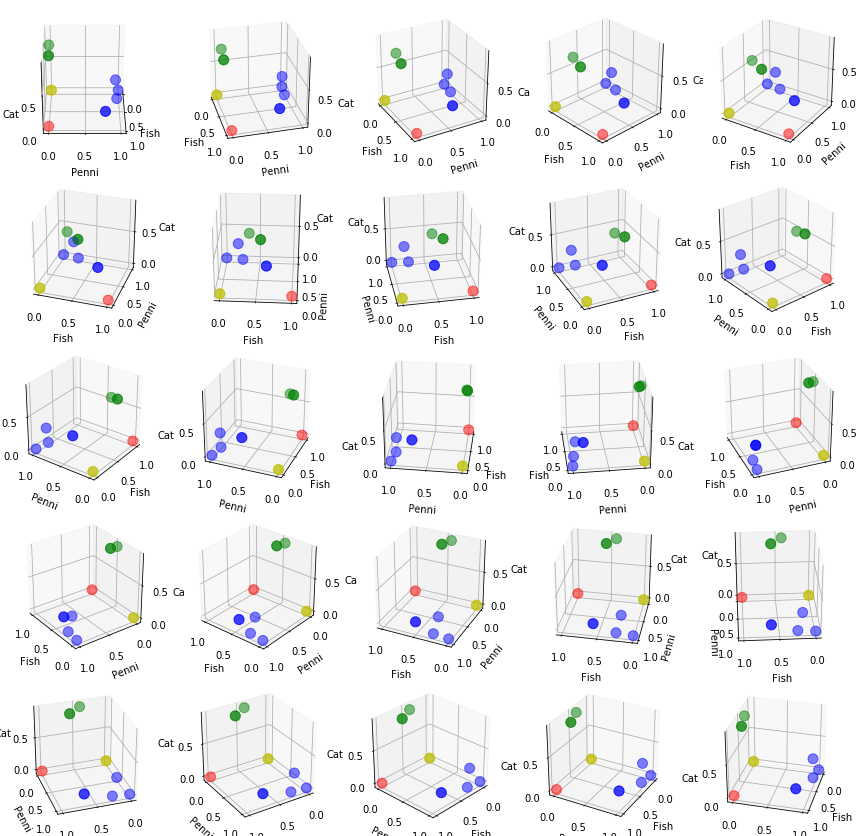

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df):
    color_list = ['r', 'b', 'g', 'y']
    colors = [color_list[i] for i in df['category']]

    marker_list = ['o', 'x', 'v', 'X']
    markers = [marker_list[i] for i in df['category']]

    ax.scatter(df['fish'], df['penny'], df['cat'], c=colors, s=100, alpha=0.5)
    ax.set_xlabel('Fish')
    ax.set_ylabel('Penni')
    ax.set_zlabel('Cat')

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df)

Weeeeee